# SOD 314 - Numerical project in Python - Cooperative Kernel Regression
*Author : Lucas Selini*

# Part I (Class 1 and 2)

In [96]:
# Import all the necessary libraries
from utils.graphs import *
from utils.dgd import *
from utils.gt import *
from utils.fct import *
import pickle
import numpy as np
import matplotlib.pyplot as plt

In [97]:
# Load data
with open('./database/first_database.pkl', 'rb') as f:
    x, y = pickle.load(f)

# Parameters
n, m, a = 100, 10, 5
sigma2 = 0.25
nu = 1

# Generate data
x_n=x[:n] 
y_n=y[:n]
sel = [i for i in range(n)]
ind = np.random.choice(sel, m, replace=False)
x_selected = np.array([x[i] for i in ind])

# Generate communication graphs
fully_connected_graph = generate_graph_fully_connected(a)
line_graph=generate_graph_line(a)
small_world_graph=generate_graph_small_world(a)

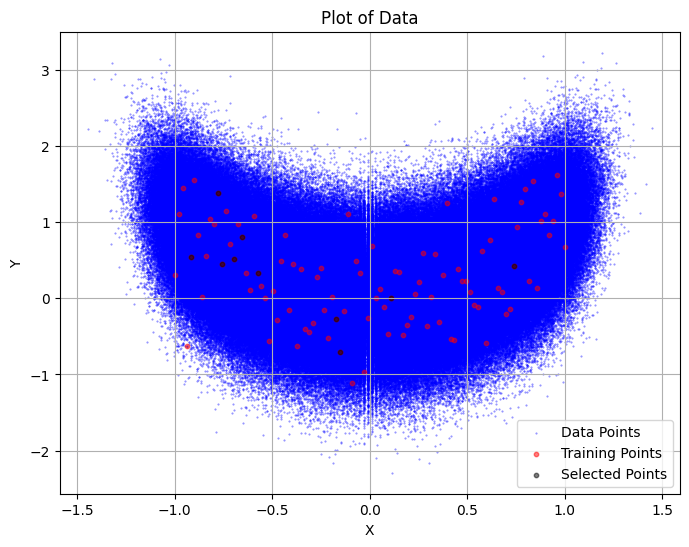

In [58]:
# Create a scatter plot to visualize the data
plt.figure(figsize=(8, 6))
plt.scatter(x, y, color='blue',s=0.2, alpha=0.5, label='Data Points')
plt.scatter(x_n, y_n, color='red',s=10, alpha=0.5, label='Training Points')
plt.scatter(x_selected, [y[i] for i in ind], color='black',s=10, alpha=0.5, label='Selected Points')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Plot of Data')
plt.legend()
plt.grid(True)
plt.show()

## Decentralized Gradient Descent

In [79]:
# Choose the number of iterations and the step size

n_iter = 20000
step_size = 0.002

# Compute the optimal alpha_star

K_mm = compute_kernel_matrix(x_selected, x_selected)
K_nm = compute_kernel_matrix(x_n, x_selected)
alpha_star = compute_alpha_star(K_mm, K_nm, y_n, sigma2, nu)

# Run decentralized gradient descent

optimality_gap_line,alpha_line = decentralized_gradient_descent(
    x_n, x_selected, y_n, sigma2, nu, a, n_iter, step_size, alpha_star, line_graph)

# optimality_gap_small_world,alpha_small_world = decentralized_gradient_descent(
#     x_n, x_selected, y_n, sigma2, nu, a, n_iter, step_size, alpha_star, small_world_graph)

# optimality_gap_fully_connected,alpha_fully_connected = decentralized_gradient_descent(
#     x_n, x_selected, y_n, sigma2, nu, a, n_iter, step_size, alpha_star, fully_connected_graph)

In [80]:
len(optimality_gap_line)

5

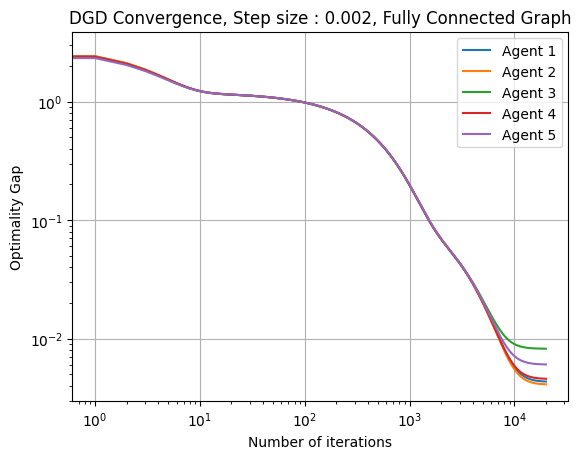

In [62]:
# Plot optimality gaps for each agent : Fully connected Graph

for agent_idx, optimality_gaps in enumerate(optimality_gap_fully_connected):
    plt.plot(range(n_iter), optimality_gaps, label=f"Agent {agent_idx + 1}")

plt.xlabel('Number of iterations')
plt.ylabel('Optimality Gap')
plt.title(f'DGD Convergence, Step size : {step_size}, Fully Connected Graph')
plt.legend()
plt.yscale('log')
plt.xscale('log')
plt.grid(True)
plt.show()

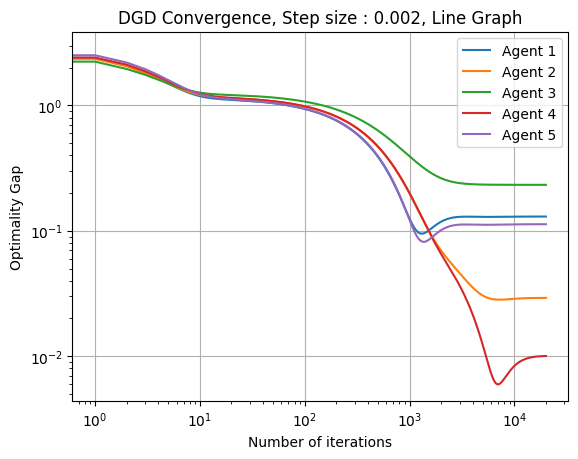

In [63]:
# Plot optimality gaps for each agent : Line Graph

for agent_idx, optimality_gaps in enumerate(optimality_gap_line):
    plt.plot(range(n_iter), optimality_gaps, label=f"Agent {agent_idx + 1}")

plt.xlabel('Number of iterations')
plt.ylabel('Optimality Gap')
plt.title(f'DGD Convergence, Step size : {step_size}, Line Graph')
plt.legend()
plt.yscale('log')
plt.xscale('log')
plt.grid(True)
plt.show()

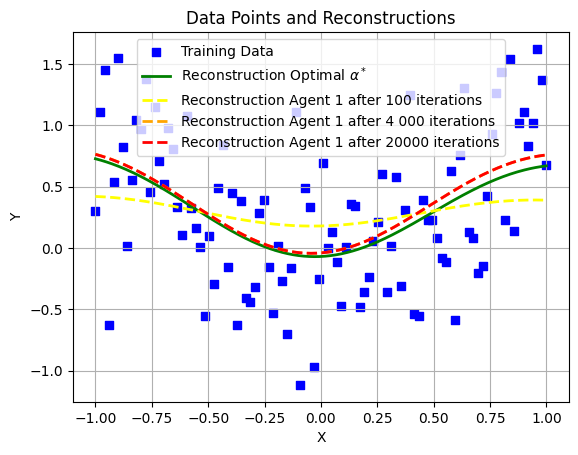

In [66]:
nt=250
x_prime=np.linspace(-1,1,nt)

ag_idx = 0 

alpha_agent_line100 = alpha_line[100][ag_idx*m:(ag_idx+1)*m]
alpha_agent_line4000 = alpha_line[4000][ag_idx*m:(ag_idx+1)*m]
alpha_agent_linefinal = alpha_line[n_iter-1][ag_idx*m:(ag_idx+1)*m]

reconstruction_line100=nystrom_approx(alpha_agent_line100,x_selected,x_prime)
reconstruction_line4000=nystrom_approx(alpha_agent_line4000,x_selected,x_prime)
reconstruction_linefinal=nystrom_approx(alpha_agent_linefinal,x_selected,x_prime)
reconstruction_alphastar = nystrom_approx(alpha_star,x_selected,x_prime)

# Plot data points used for DGD with squares
plt.scatter(x_n, y_n, color='blue', marker='s', label='Training Data')

# Plot reconstructions with thicker lines
plt.plot(x_prime, reconstruction_alphastar, color='green', linewidth=2, label=r'Reconstruction Optimal $\alpha^*$')
plt.plot(x_prime, reconstruction_line100, color='yellow',linewidth=2, label=f'Reconstruction Agent {ag_idx+1} after 100 iterations', linestyle='dashed')
plt.plot(x_prime, reconstruction_line4000, color='orange', linewidth=2, label=f'Reconstruction Agent {ag_idx+1} after 4 000 iterations', linestyle='dashed')
plt.plot(x_prime, reconstruction_linefinal, color='red', linewidth=2, label=f'Reconstruction Agent {ag_idx+1} after {n_iter} iterations', linestyle='dashed')



plt.xlabel('X')
plt.ylabel('Y')
plt.title('DGD Obtained Reconstruction')
plt.legend()
plt.grid(True)
plt.show()

## Gradient Tracking

In [98]:
# Choose the number of iterations and the step size

n_iter = 5000
step_size = 0.002
a = 5
# Compute the optimal alpha_star

K_mm = compute_kernel_matrix(x_selected, x_selected)
K_nm = compute_kernel_matrix(x_n, x_selected)
alpha_star = compute_alpha_star(K_mm, K_nm, y_n, sigma2, nu)

# Run gradient tracking

optimality_gaps, alphas = gradient_tracking(
    x_n, x_selected, y_n, sigma2, nu, a, n_iter, step_size, alpha_star, line_graph)
print(f'After function call, len(optimality_gaps): {len(optimality_gaps)}')

# optimality_gap_small_world,alpha_small_world = gradient_tracking(
#     x_n, x_selected, y_n, sigma2, nu, a, n_iter, step_size, alpha_star, small_world_graph)

# optimality_gap_fully_connected,alpha_fully_connected = gradient_tracking(
#     x_n, x_selected, y_n, sigma2, nu, a, n_iter, step_size, alpha_star, fully_connected_graph)

After function call, len(optimality_gaps): 5000


1

ValueError: x and y must have same first dimension, but have shapes (5000,) and (50, 1)

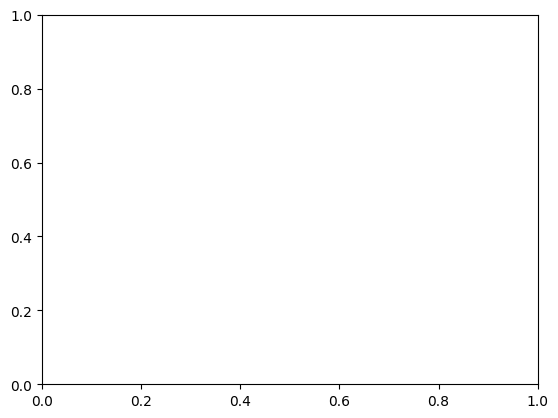

In [73]:
# Plot optimality gaps for each agent : Line Graph

for agent_idx, optimality_gaps in enumerate(optimality_gap_line):
    plt.plot(range(n_iter), optimality_gaps, label=f"Agent {agent_idx + 1}")

plt.xlabel('Number of iterations')
plt.ylabel('Optimality Gap')
plt.title(f'GT Convergence, Step size : {step_size}, Line Graph')
plt.legend()
plt.yscale('log')
plt.xscale('log')
plt.grid(True)
plt.show()

In [ ]:
nt=250
x_prime=np.linspace(-1,1,nt)

ag_idx = 0 

alpha_agent_line100 = alpha_line[100][ag_idx*m:(ag_idx+1)*m]
alpha_agent_line4000 = alpha_line[4000][ag_idx*m:(ag_idx+1)*m]
alpha_agent_linefinal = alpha_line[n_iter-1][ag_idx*m:(ag_idx+1)*m]

reconstruction_line100=nystrom_approx(alpha_agent_line100,x_selected,x_prime)
reconstruction_line4000=nystrom_approx(alpha_agent_line4000,x_selected,x_prime)
reconstruction_linefinal=nystrom_approx(alpha_agent_linefinal,x_selected,x_prime)
reconstruction_alphastar = nystrom_approx(alpha_star,x_selected,x_prime)

# Plot data points used for DGD with squares
plt.scatter(x_n, y_n, color='blue', marker='s', label='Training Data')

# Plot reconstructions with thicker lines
plt.plot(x_prime, reconstruction_alphastar, color='green', linewidth=2, label=r'Reconstruction Optimal $\alpha^*$')
plt.plot(x_prime, reconstruction_line100, color='yellow',linewidth=2, label=f'Reconstruction Agent {ag_idx+1} after 100 iterations', linestyle='dashed')
plt.plot(x_prime, reconstruction_line4000, color='orange', linewidth=2, label=f'Reconstruction Agent {ag_idx+1} after 4 000 iterations', linestyle='dashed')
plt.plot(x_prime, reconstruction_linefinal, color='red', linewidth=2, label=f'Reconstruction Agent {ag_idx+1} after {n_iter} iterations', linestyle='dashed')



plt.xlabel('X')
plt.ylabel('Y')
plt.title('GT Obtained Reconstruction')
plt.legend()
plt.grid(True)
plt.show()